# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

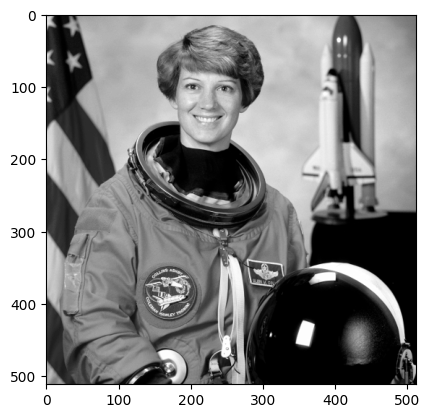

In [3]:
img_in=plt.imread('data/astronaut.png')
plt.imshow(img_in, 'gray')

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [12]:
def prewitt_h(img_in):
    result = numpy.zeros(img_in.shape)
    n = 1
    kernel = numpy.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    for p in numpy.ndindex(img_in.shape):
        i, j = p
        if i < n or j < n or i >= img_in.shape[0] - n or j >= img_in.shape[1] - n:
            continue 
        value = 0
        for q in numpy.ndindex(3, 3):
            di = q[0] - n
            dj = q[1] - n
            neighbor_i = i + di
            neighbor_j = j + dj
            value += img_in[neighbor_i, neighbor_j] * kernel [q[0], q[1]]
        
        result[p] = value/6.0
        
    return result
    
def prewitt_v(img_in):
    result = numpy.zeros(img_in.shape)
    n = 1
    kernel = numpy.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])
    for p in numpy.ndindex(img_in.shape):
        i, j = p
        if i < n or j < n or i >= img_in.shape[0] - n or j >= img_in.shape[1] - n:
            continue 
        value = 0
        for q in numpy.ndindex(3, 3):
            di = q[0] - n
            dj = q[1] - n
            neighbor_i = i + di
            neighbor_j = j + dj
            value += img_in[neighbor_i, neighbor_j] * kernel [q[0], q[1]]
        
        result[p] = value/6.0
        
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

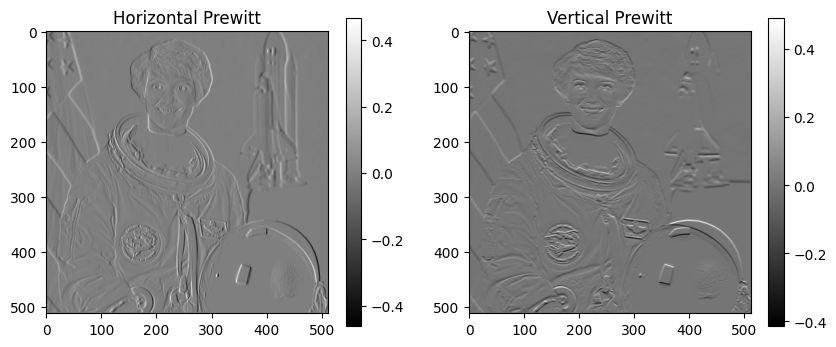

In [13]:
horiPrew = prewitt_h(img_in)
vertPrew = prewitt_v(img_in)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Horizontal Prewitt")
plt.imshow(horiPrew, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Vertical Prewitt")
plt.imshow(vertPrew, cmap='gray')
plt.colorbar()

plt.show()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [16]:
import skimage.io
Prewitt_hcorr= skimage.io.imread('data/astronaut_prewitt_h.tiff')
Prewitt_vcorr= skimage.io.imread('data/astronaut_prewitt_v.tiff')
assert numpy.allclose(horiPrew, Prewitt_hcorr, atol=1/255)
assert numpy.allclose(vertPrew, Prewitt_vcorr, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

In [18]:
magnitude = numpy.sqrt((horiPrew)*(horiPrew) + (vertPrew)*(vertPrew))

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [20]:
import skimage.io
Magnitudecorr= skimage.io.imread('data/astronaut_prewitt_gradmag.tiff')
assert numpy.allclose(magnitude, Magnitudecorr, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`: